In [150]:
import numpy as np
import pandas as pd

In [151]:
dataset = "./data/mushrooms.csv"

data = pd.read_csv(dataset)  # read DataSet

print("DataSet Size : {}".format(data.shape))
data.head(5)  # top 5 contents

DataSet Size : (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [152]:

## Validate DataSet (find NaN)## Vali 
data.isnull().any()  # There aren't any NaN cols


class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [153]:
## DataSet infomation
data.info()

"""
- 8124 data
- 22 features (except 'class')
"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

"\n- 8124 data\n- 22 features (except 'class')\n"

In [177]:
tmp_data = data[["class", "cap-shape"]]
values = tmp_data["cap-shape"].value_counts().keys()

poison_mushroom_value_counts = tmp_data.loc[tmp_data["class"] == "p"]["cap-shape"].value_counts()
edible_mushroom_value_counts = tmp_data.loc[tmp_data["class"] == "e"]["cap-shape"].value_counts()

print(values)
print(poison_mushroom_value_counts.values)
print(edible_mushroom_value_counts.values)

Index(['x', 'f', 'k', 'b', 's', 'c'], dtype='object')
[1708 1556  600   48    4]
[1948 1596  404  228   32]


In [178]:
def percent_list(alist, blist):
    apersent_list = []
    bpersent_list = []
    
    for avalue, bvalue in zip(alist, blist):
        total = avalue + bvalue
        
        apersent_list.append((avalue/total) * 100)
        bpersent_list.append((bvalue/total) * 100)
        
    return apersent_list, bpersent_list

poison_mushroom_value_percent, edible_mushroom_value_percent = percent_list(poison_mushroom_value_counts, edible_mushroom_value_counts)
print(poison_mushroom_value_counts)
print(edible_mushroom_value_counts)

print(poison_mushroom_value_percent)
print(edible_mushroom_value_percent)

x    1708
f    1556
k     600
b      48
c       4
Name: cap-shape, dtype: int64
x    1948
f    1596
b     404
k     228
s      32
Name: cap-shape, dtype: int64
[46.71772428884026, 49.36548223350254, 59.76095617529881, 17.391304347826086, 11.11111111111111]
[53.282275711159734, 50.63451776649747, 40.23904382470119, 82.6086956521739, 88.88888888888889]


In [172]:
import matplotlib.pyplot as plt

In [179]:
def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

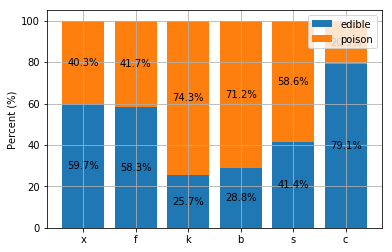

In [208]:
plt.figure(figsize=(6, 4))

series_labels = ['edible', 'poison']

tmp = [
    edible_mushroom_value_percent,
    poison_mushroom_value_percent
]

category_labels = list(map(str, values))

stacked_bar(
    tmp, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}%",
    y_label="Percent (%)"
)

plt.savefig('bar.png')
plt.show()

In [216]:
import os

if not os.path.exists('stack chart'):
    os.makedirs('stack chart')

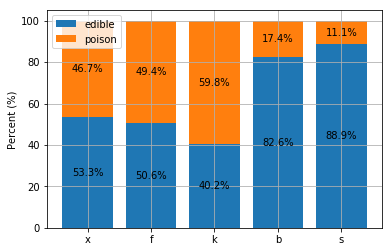

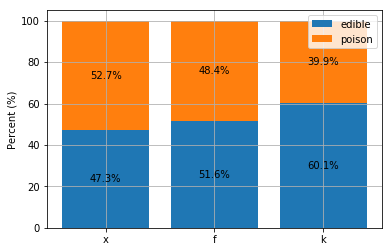

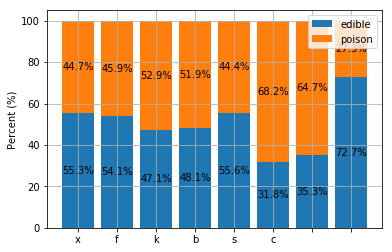

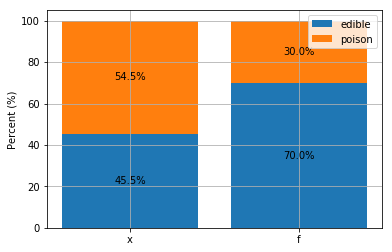

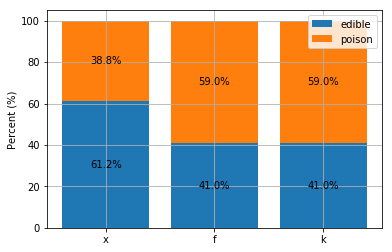

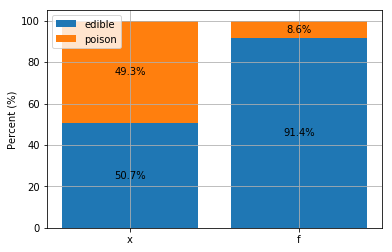

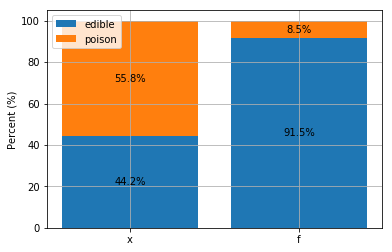

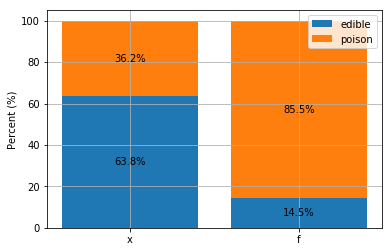

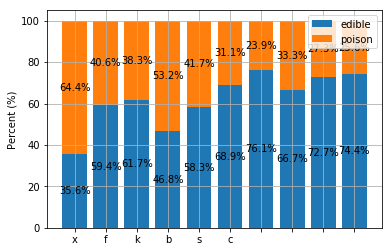

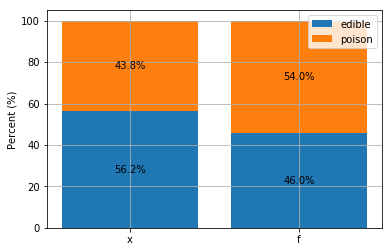

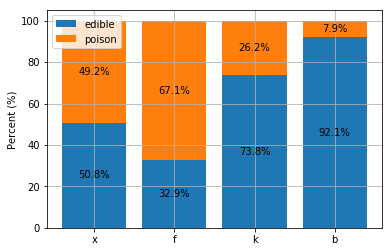

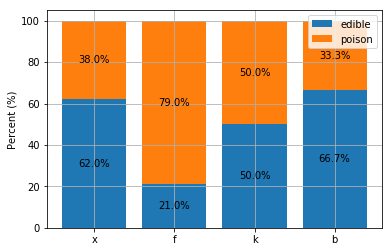

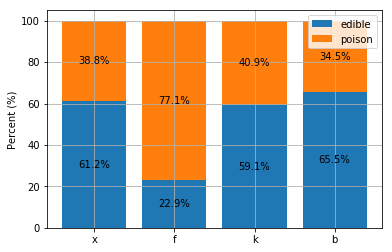

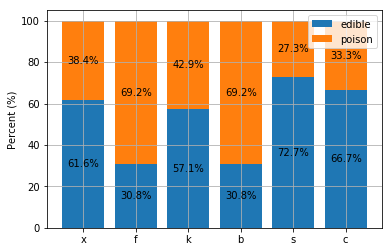

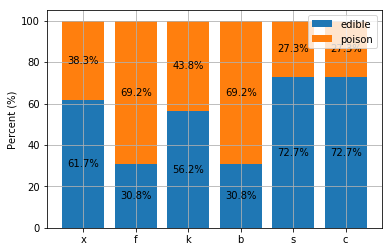

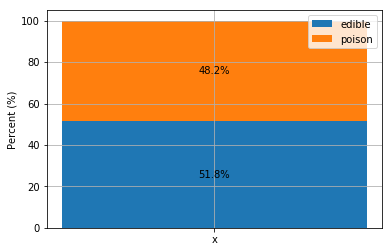

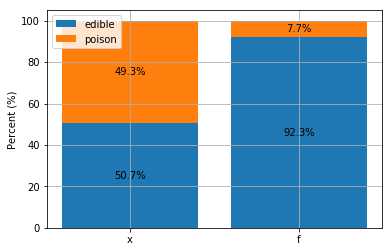

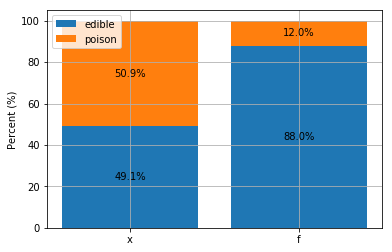

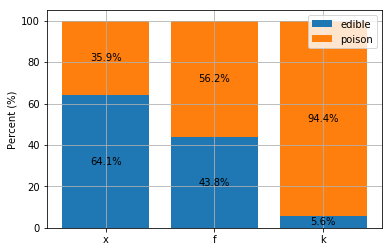

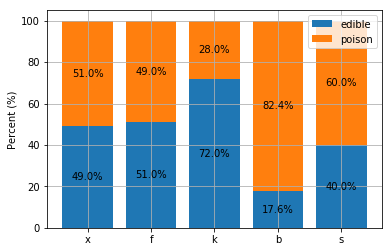

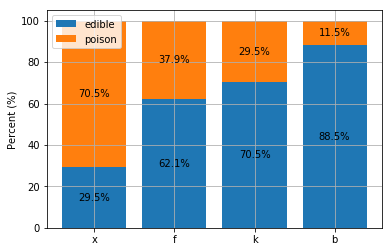

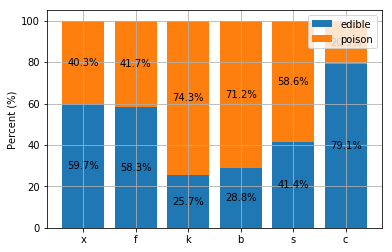

In [218]:
key_list = data.keys()

for key in key_list[1:]:
    tmp_data = data[["class", key]]
    
    poison_mushroom_value_counts = tmp_data.loc[tmp_data["class"] == "p"][key].value_counts()
    edible_mushroom_value_counts = tmp_data.loc[tmp_data["class"] == "e"][key].value_counts()
    poison_mushroom_value_percent, edible_mushroom_value_percent = percent_list(poison_mushroom_value_counts, edible_mushroom_value_counts)
    
    plt.figure(figsize=(6, 4))

    series_labels = ['edible', 'poison']

    tmp = [
        edible_mushroom_value_percent,
        poison_mushroom_value_percent
    ]

    category_labels = list(map(str, values))

    stacked_bar(
        tmp, 
        series_labels, 
        category_labels=category_labels, 
        show_values=True, 
        value_format="{:.1f}%",
        y_label="Percent (%)"
    )

    plt.savefig('./stack chart/' + key + '.png')
    plt.show()